# IRISpy SJICube

In [1]:
from irispy.sji import SJICube, dustbuster, scale_map
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.animation as animation
from astropy.coordinates.sky_coordinate import SkyCoord as SC
import astropy.units as u

%matplotlib inline
plt.rcParams.update({'figure.dpi': 100})

### IRISpy Sample Data

In [3]:
from irispy.data import sample
#To download sample data:
#irispy.data.sample.download_sample_data()
sji1330cube=SJICube(sample.SJI_CUBE_1330)
sji1400cube=SJICube(sample.SJI_CUBE_1400)
sji2796cube=SJICube(sample.SJI_CUBE_2796)
sji2832cube=SJICube(sample.SJI_CUBE_2832)
cubelist=[sji1330cube, sji1400cube, sji2796cube, sji2832cube]
#Add scale/dustbuster corrections
for cube in cubelist:
    scale_map(cube)
    dustbuster(cube)

In [4]:
#Slicing SJICube for a single SJIMap
i=8
sji1330map = sji1330cube[i]
sji1400map = sji1400cube[i]
sji2796map = sji2796cube[i]
sji2832map = sji2832cube[i]


### SJI Map Plotting

/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,


/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1115: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1119: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[res_mask] = 0
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1115: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1119: MaskedArrayFutureWarning: setting 

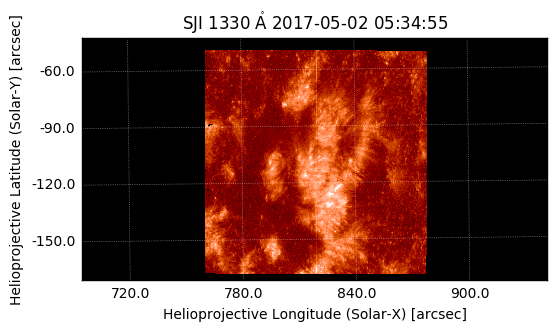

In [18]:
sji1330norm = colors.PowerNorm(.4, 1, 300)
sji1330map.plot_settings['norm']=sji1330norm
sji1330map.plot()

### SJI MapCube Stats

/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1115: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1119: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[res_mask] = 0
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1115: RuntimeWarning: inva

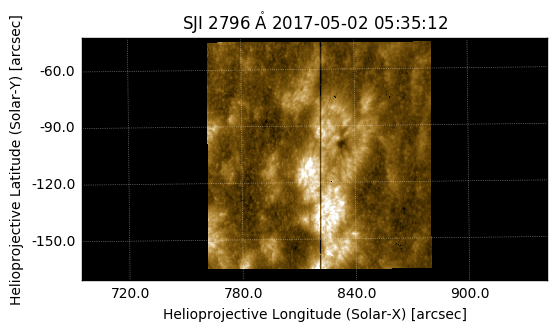

/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:1696: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata

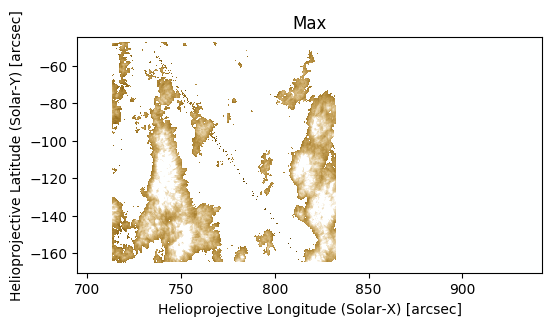

/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/s

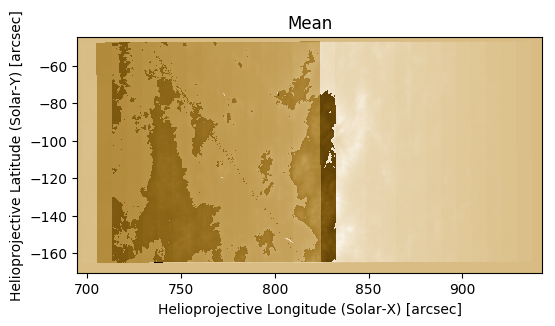

/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/s

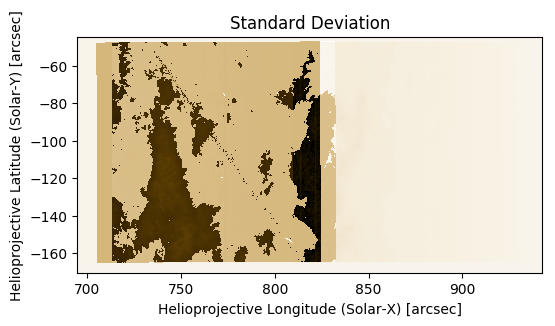

In [10]:
sji2796norm = colors.PowerNorm(.9,250, 1800)

#Plotting max, mean, and std values from all maps in the cube
#helps to find that sji2796cube contains a bad map
sji2796map.plot(norm=sji2796norm)
plt.show()
ax=plt.axes()
sji2796cube.max().plot(norm=sji2796norm)
ax.set_title('Max')
plt.show()

ax=plt.axes()
sji2796cube.mean().plot(norm=colors.Normalize())
ax.set_title('Mean')
plt.show()

ax=plt.axes()
sji2796cube.std().plot(norm=colors.Normalize())
ax.set_title('Standard Deviation')
plt.show()

### Animate SJI MapCube

/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/s

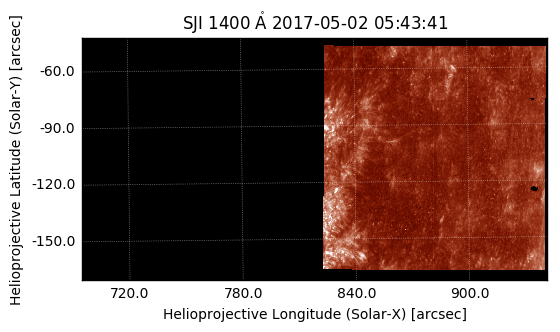

/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1115: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1119: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[res_mask] = 0
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1115: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1119: MaskedArrayFutureWarning: setting 

In [11]:
from IPython.display import HTML
maplist=[]
sji1400norm = colors.PowerNorm(.5,1,600)
fig0=plt.figure(dpi=100)
#In progress, normally sunpy mapcubes will animate with simply .plot() or .peek(),
#Workaround -> create list of <matplotlib.image.AxesImage> types and use
#matplotlib animator:
for n in sji1400cube:
    maplist.append([n.plot(norm=sji1400norm)])
plt.show()

anim = animation.ArtistAnimation(fig0, maplist, interval=20, blit=True)

#Saving animation requires mpeg writer, i.e. ffmpeg, HTML5 is great for ipython notebooks
#ex: anim.save(fig, output file, writer=writer)
HTML(anim.to_html5_video())


# GUI Overlays

/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/s

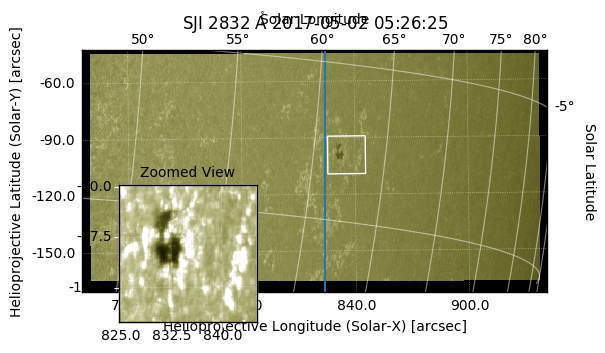

In [9]:
fig1=plt.figure(dpi=100)
sji2832norm = colors.PowerNorm(1,200, 2500)
sji2832cube.max().plot_settings['norm']=sji2832norm
sji2832cube.max().plot()


# Add overlay slit
sji2832map.draw_slit()
# Add a overlay grid.
sji2832map.draw_grid(grid_spacing=5*u.deg)
# Define a region of interest
length = 20 * u.arcsec
x = 825 * u.arcsec
y = -110 * u.arcsec
bl = SC(x, y, frame= 'helioprojective')
tr = SC(x+length, y+length, frame= 'helioprojective')
submap = sji2832cube.max().submap(bl,tr)
submap.plot_settings['norm']=sji2832norm


#ax = fig3.add_subplot(2,1,1, projection=sji2832.max())
sji2832map.draw_rectangle(SC(x+7*u.arcsec, y-13*u.arcsec,frame= 'helioprojective'),length,-length)

ax1 = fig1.add_subplot(2,2,3, projection=submap)
submap.plot(ax1)
ax1.set_title('Zoomed View',  fontsize=10)
plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_xlabel('',visible=False)
ax1.set_ylabel('',visible=False)



In [10]:
x0 = 805 * u.arcsec
y0 = -155 * u.arcsec
xlength = 40 * u.arcsec
ylength = 100 * u.arcsec
bl = SC(x0, y0, frame= 'helioprojective')
tr = SC(x0 + xlength, y0 + ylength, frame= 'helioprojective')

submap0=sji2832map.submap(bl,tr)
submap1=sji2796map.submap(bl,tr)
submap2=sji1330map.submap(bl,tr)
submap3=sji1400map.submap(bl,tr)


/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/s

/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:1696: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata

/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:1115: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)
/Users/shelbe/anaconda/envs/irispy-dev/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


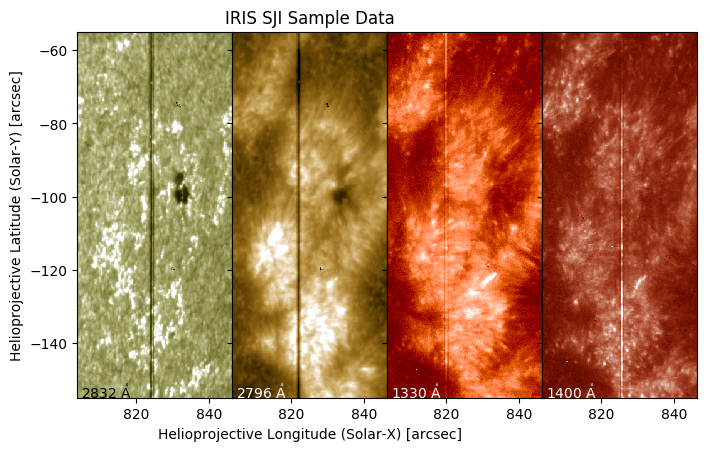

In [11]:
fig2,ax2 =plt.subplots(1,4, figsize=(8,4.85),dpi=100,facecolor='w', edgecolor='k',sharey=True, sharex=True)
plt.subplots_adjust(hspace = .5, wspace=.001)


#Plot settings and Axes Labels
submap0.plot_settings['norm']=sji2832norm
submap0.plot(axes=ax2[0])
submap1.plot_settings['norm']=sji2796norm
submap1.plot(axes=ax2[1])
submap2.plot_settings['norm']=sji1330norm
submap2.plot(axes=ax2[2])
submap3.plot_settings['norm']=sji1400norm
submap3.plot(axes=ax2[3])

ax2[0].set_title('')
ax2[1].set_title('IRIS SJI Sample Data')
ax2[2].set_title('')
ax2[3].set_title('')
ax2[0].set_xlabel('', visible=False)
ax2[2].set_xlabel('', visible=False)
ax2[3].set_xlabel('', visible=False)
ax2[1].set_ylabel('', visible=False)
ax2[2].set_ylabel('', visible=False)
ax2[3].set_ylabel('', visible=False)
           
#Annotations
ax2[0].annotate(submap0.wavelength._repr_latex_(),xy=(bl.data._lon.arcsec,bl.data._lat.arcsec),color='black')
ax2[1].annotate(submap1.wavelength._repr_latex_(),xy=(bl.data._lon.arcsec,bl.data._lat.arcsec),color='white')
ax2[2].annotate(submap2.wavelength._repr_latex_(),xy=(bl.data._lon.arcsec,bl.data._lat.arcsec),color='white')
ax2[3].annotate(submap3.wavelength._repr_latex_(),xy=(bl.data._lon.arcsec,bl.data._lat.arcsec),color='white')


### SJI Meta

In [12]:
sji2832map.meta

SIMPLE  =                    T / Written by IDL:  Fri May  5 18:32:09 2017      
BITPIX  =                   16 / Number of bits per data pixel                  
NAXIS   =                    3 / Number of data axes                            
NAXIS1  =                 1482 /                                                
NAXIS2  =                  772 /                                                
NAXIS3  =                   16 /                                                
EXTEND  =                    T / FITS data may contain extensions               
DATE    = '2017-05-06'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
TELESCOP= 'IRIS    '           /                                                
INSTRUME= 'SJI     '           /                                                
DATA_LEV=              2.000

In [13]:
sji2832map

/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/shelbe/Developer/sunpy_dev/sunpy/map/mapbase.py:630: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,


SunPy Map
---------
Observatory:		 IRIS
Instrument:		 SJI
Detector:		 SJI
Measurement:		 2832.0 Angstrom
Wavelength:		 2832.0 Angstrom
Observation Date:	 2017-05-02 05:35:29
Exposure Time:		 15.000113 s
Dimension:		 [ 1482.   772.] pix
Coordinate System:	 helioprojective
Scale:			 [ 0.16635  0.16635] arcsec / pix
Reference Pixel:	 [ 741.5  386.5] pix
Reference Coord:	 [ 818.58  -107.656] arcsec

array([[-800, -800, -800, ..., -800, -800, -800],
       [-800, -800, -800, ..., -800, -800, -800],
       [-800, -800, -800, ..., -800, -800, -800],
       ..., 
       [-800, -800, -800, ..., -800, -800, -800],
       [-800, -800, -800, ..., -800, -800, -800],
       [-800, -800, -800, ..., -800, -800, -800]], dtype=int16)

In [14]:
# Meta data are stored as <astropy.units.quantity> objects
print(sji2832map.measurement)
sji2832map.measurement#._repr_latex_()


2832.0 Angstrom


<Quantity 2832.0 Angstrom>

In [15]:
# Check and change units
print(sji2832map.measurement.unit)
print(sji2832map.measurement.si)
print(sji2832map.measurement.to('nm'))
# Convert units
print(sji2832map.measurement.to('keV', equivalencies=u.spectral()))

Angstrom
2.8320000000000005e-07 m
283.2 nm
0.004377973071907032 keV
